#                                      DISNEYLAND DREAMS - Analyzing Sentiments and Creating Personalized Chatbot Experiences

This project titled, “DISNEYLAND DREAMS – Analyzing Sentiments and creating Personalized Chatbot Experiences” aims in leveraging Natural Language Processing techniques to analyze customer sentiments expressed in textual data such as reviews and feedback with respect to Disneyland Park locations. 

This analysis aims to gain insights on visitor perceptions, emotions, and preferences regarding attractions and experiences at Disneyland locations in California, Paris, and Hong Kong. It can be accomplished by delving into the architecture of neural network model for understanding and predicting the user emotions from text messages.

It is an important factor when it comes to monitoring Customer Satisfaction, Brand Reputation management, Predictive Analytics on future trends and personalized customer experience.

## Sentiment Analysis using various Machine Learning models:

**Importing basic libraries**:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\priya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Defining Disney dataset**:

In [2]:
# Reading the Cleaned CSV file that is created as part of Exploratory Data Analysis
disneydf = pd.read_csv(r'C:\Users\priya\Downloads\Projectwork\Cleaned_Disneydf.csv')   
disneydf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive
...,...,...,...,...,...,...,...
42629,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,Positive
42630,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,Positive
42631,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Positive
42632,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Positive


In [3]:
disneydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42634 entries, 0 to 42633
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42634 non-null  int64 
 1   Rating             42634 non-null  int64 
 2   Year_Month         42634 non-null  object
 3   Reviewer_Location  42634 non-null  object
 4   Review_Text        42634 non-null  object
 5   Branch             42634 non-null  object
 6   Sentiment          42634 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.3+ MB


In [4]:
# To identify the number of rows and columns in a dataset
disneydf.shape

(42634, 7)

In [5]:
# Check for null values
disneydf.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
Sentiment            0
dtype: int64

In [6]:
disneydf['Sentiment'].value_counts()

Positive    39008
Negative     3626
Name: Sentiment, dtype: int64

# Sentiment Analysis using efficient code method and implemented model training, prediction, ROC computation, and plotting:

**1. Data Pre-processing:**

In [7]:
# Creating a balanced dataset by taking just 5000 positive sentiment samples for better predictions 
positive_sentiment = disneydf[disneydf['Sentiment'] == 'Positive']
positive_samples = positive_sentiment.sample(4000,random_state=123)
positive_samples

negative_sentiment = disneydf[disneydf['Sentiment'] == 'Negative']

#neutral_sentiment = disneydf[disneydf['Sentiment'] == 'Neutral']
#neutral_samples = neutral_sentiment.sample(3000,random_state=123)
#neutral_samples

In [8]:
balanced_data = pd.concat([positive_samples,negative_sentiment],axis=0)

# To remove unwanted columns from a dataset that are no longer useful for prediction
balanced_data.drop(columns=['Review_ID','Year_Month','Reviewer_Location'],inplace=True,axis=1)
balanced_data.shape

balanced_data.reset_index(drop=True,inplace=True)
balanced_data

,Rating,Review_Text,Branch,Sentiment
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,Positive
1,5,Disney Land is the perfect home away from home...,Disneyland_California,Positive
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,Positive
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,Positive
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,Positive
...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,Negative
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,Negative
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,Negative
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,Negative


In [9]:
balanced_data['Sentiment'].value_counts()

Positive    4000
Negative    3626
Name: Sentiment, dtype: int64

In [11]:
balanced_data['Rating'].value_counts()

5    2379
2    2127
1    1499
4    1133
3     488
Name: Rating, dtype: int64

In [12]:
balanced_data.isnull().sum()

Rating         0
Review_Text    0
Branch         0
Sentiment      0
dtype: int64

In [13]:
balanced_data.shape

(7626, 4)

**Text Pre-processing:**
 

Steps to clean and prepare the raw text data for sentiment analysis:
1. Tokenization: Split the text into individual words or tokens
2. Lowercasing: Convert all text to lowercase to ensure consistency
3. Removing Punctuation and Special Characters: Remove any non-alphanumeric characters
4. Stemming or Lemmatization: Reduce words to their base or root form
5. Joining Tokens: Join the individual tokens back into sentences or documents

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

text_tokens = [word_tokenize(sentence) for sentence in balanced_data['Review_Text']]

text_lower = [[word.lower() for word in sentence] for sentence in text_tokens]

text_clean = [[re.sub(r'[^a-zA-Z]', '', word) for word in sentence] for sentence in text_lower]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
text_no_stopwords = [[word for word in sentence if word not in stop_words] for sentence in text_clean]
text_no_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['better',
  'expected',
  'time',
  '',
  'year',
  'old',
  'girl',
  '',
  'infant',
  'son',
  '',
  'wife',
  'parentsmy',
  'daughter',
  'loved',
  'princess',
  'faire',
  'attended',
  'events',
  'almost',
  'daily',
  '',
  'wearing',
  'snow',
  'white',
  'dress',
  '',
  'intention',
  'go',
  'th',
  'birthday',
  'able',
  'remember',
  'turned',
  'perfect',
  'age',
  'really',
  'excited',
  'see',
  'princesses',
  '',
  'highlights',
  '',
  'us',
  '',
  '',
  'daily',
  'sylvania',
  'parade',
  'watched',
  'afternoon',
  'show',
  'fine',
  '',
  'evening',
  'show',
  'late',
  'little',
  'onesfantasyland',
  'loved',
  'outside',
  'rides',
  'mostly',
  'teacup',
  'ride',
  '',
  'dumbo',
  '',
  'casey',
  'jr',
  'train',
  '',
  'carousel',
  'especiallyphotopass',
  '',
  '',
  'get',
  'cd',
  'unlimited',
  'photos',
  'taken',
  'photographers',
  'stationed',
  'main',
  'landmarks',
  '',
  'eg',
  '',
  'cinderella',
  'castle',
  '',
  'various

In [16]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

text_stemmed = [[stemmer.stem(word) for word in sentence] for sentence in text_no_stopwords]
text_stemmed

stemmed_text_data = [' '.join(sentence) for sentence in text_stemmed]
balanced_data['Stemmed_Text'] = stemmed_text_data
balanced_data

,Rating,Review_Text,Branch,Sentiment,Stemmed_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,Positive,better expect time year old girl infant son ...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,Positive,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,Positive,truli disney place showcas disney charact lo...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,Positive,wife visit disneyland park start novemb ever ...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,Positive,say time worst yet level ride closur peak s...
...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,Negative,start say comment around non disney thing most...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,Negative,disneyland great place spend time children rea...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,Negative,first trip disneyland pleasantli surpris much ...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,Negative,line low that good staff rude guess that eu...


In [17]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

text_lemmatized = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in text_no_stopwords]
text_lemmatized

lemmatized_text_data = [' '.join(sentence) for sentence in text_lemmatized]
lemmatized_text_data
balanced_data['Lemmatized_Text'] = lemmatized_text_data
balanced_data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Rating,Review_Text,Branch,Sentiment,Stemmed_Text,Lemmatized_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,Positive,better expect time year old girl infant son ...,better expected time year old girl infant so...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,Positive,disney land perfect home away home moment wal...,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,Positive,truli disney place showcas disney charact lo...,truly disney place showcase disney character ...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,Positive,wife visit disneyland park start novemb ever ...,wife visited disneyland park start november e...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,Positive,say time worst yet level ride closur peak s...,say time worst yet level ride closure peak ...
...,...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,Negative,start say comment around non disney thing most...,start saying comment around non disney thing m...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,Negative,disneyland great place spend time children rea...,disneyland great place spend time child ready ...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,Negative,first trip disneyland pleasantli surpris much ...,first trip disneyland pleasantly surprised muc...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,Negative,line low that good staff rude guess that eu...,line low thats good staff rude guess thats ...


In [18]:
# Replace to numerical values to make the machine learning models for better computation
balanced_data["Sentiment"].replace({"Negative": 0, "Positive":1}, inplace =True)
balanced_data

,Rating,Review_Text,Branch,Sentiment,Stemmed_Text,Lemmatized_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,1,better expect time year old girl infant son ...,better expected time year old girl infant so...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,1,disney land perfect home away home moment wal...,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,1,truli disney place showcas disney charact lo...,truly disney place showcase disney character ...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,1,wife visit disneyland park start novemb ever ...,wife visited disneyland park start november e...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,1,say time worst yet level ride closur peak s...,say time worst yet level ride closure peak ...
...,...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,0,start say comment around non disney thing most...,start saying comment around non disney thing m...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,0,disneyland great place spend time children rea...,disneyland great place spend time child ready ...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,0,first trip disneyland pleasantli surpris much ...,first trip disneyland pleasantly surprised muc...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,0,line low that good staff rude guess that eu...,line low thats good staff rude guess thats ...


In [19]:
# Loading the balanced data in a CSV file for further use by machine learning and deep learning models 
# for further analysis
balanced_data.to_csv(r'C:\Users\priya\Downloads\Projectwork\Balanced_Disneydf.csv', index=False)

# Trying to read the cleaned and balanced CSV file that is loaded in the local drive
balanced_disneydf = pd.read_csv(r'C:\Users\priya\Downloads\Projectwork\Balanced_Disneydf.csv')  
balanced_disneydf

,Rating,Review_Text,Branch,Sentiment,Stemmed_Text,Lemmatized_Text
0,4,Had a better than expected time with my 2.5 ye...,Disneyland_California,1,better expect time year old girl infant son ...,better expected time year old girl infant so...
1,5,Disney Land is the perfect home away from home...,Disneyland_California,1,disney land perfect home away home moment wal...,disney land perfect home away home moment wal...
2,5,Truly Disney..... A place that showcases abou...,Disneyland_HongKong,1,truli disney place showcas disney charact lo...,truly disney place showcase disney character ...
3,4,My wife and I visited Disneyland Park at the s...,Disneyland_Paris,1,wife visit disneyland park start novemb ever ...,wife visited disneyland park start november e...
4,3,As it says I've been here 3 times and this was...,Disneyland_Paris,1,say time worst yet level ride closur peak s...,say time worst yet level ride closure peak ...
...,...,...,...,...,...,...
7621,2,I will start off by saying that comments aroun...,Disneyland_Paris,0,start say comment around non disney thing most...,start saying comment around non disney thing m...
7622,2,Disneyland is a great place to spend time with...,Disneyland_Paris,0,disneyland great place spend time children rea...,disneyland great place spend time child ready ...
7623,2,This was my first trip to Disneyland and I was...,Disneyland_Paris,0,first trip disneyland pleasantli surpris much ...,first trip disneyland pleasantly surprised muc...
7624,2,"The lines are low, thats good, the staff are r...",Disneyland_Paris,0,line low that good staff rude guess that eu...,line low thats good staff rude guess thats ...


#### Train Test Split:

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [21]:
# Creating two object 'X' and 'y' to perform train_test_split and use different machine learning models
X= balanced_data['Stemmed_Text']
y= balanced_data['Sentiment']
y.value_counts()

1    4000
0    3626
Name: Sentiment, dtype: int64

In [23]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

## Bag of words model:

**This model is used to convert text documents to numerical vectors or bag of words.**

In [24]:
vectorizer = CountVectorizer() 
vectorized_training_data = vectorizer.fit_transform(X_train)
vectorized_test_data = vectorizer.transform(X_test)

print( "Bag Of Words - Training data input: "  , X_train.shape)
print( "Bag Of Words - Test data input: "      , X_test.shape)
print("\n")

print( "Bag Of Words - Vectorized training data input: "     , vectorized_training_data.shape)
print( "Bag Of Words - Training data output: "               , y_train.shape)
print("\n")

print( "Bag Of Words - Vectorized Test data input: "     , vectorized_test_data.shape)
print( "Bag Of Words - Test data output: "               , y_test.shape)

Bag Of Words - Training data input:  (6100,)
Bag Of Words - Test data input:  (1526,)


Bag Of Words - Vectorized training data input:  (6100, 16385)
Bag Of Words - Training data output:  (6100,)


Bag Of Words - Vectorized Test data input:  (1526, 16385)
Bag Of Words - Test data output:  (1526,)


In [25]:
y_test.value_counts()

1    823
0    703
Name: Sentiment, dtype: int64

## Term Frequency-Inverse Document Frequency model (TF-IDF):

In [26]:
# Tfidf vectorizer
tf = TfidfVectorizer()
wghted_training_data = tf.fit_transform(X_train)
wghted_test_data = tf.transform(X_test)

print( "Weighted Training data Input:"  , wghted_training_data.shape)
print( "Weighted Test data Input:"      , wghted_test_data.shape)

Weighted Training data Input: (6100, 16385)
Weighted Test data Input: (1526, 16385)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [41]:
models = {
    "Logistic Regression" : LogisticRegression(penalty='l2', solver = 'liblinear', max_iter=1000, C=0.4, random_state=123),
    "Naive Bayes"         : MultinomialNB(alpha=1),
    "Support Vector Machine" : svm.SVC(kernel='linear', gamma=0.4, C=0.4, probability=True),
    "Decision Trees" : DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42),
    "RandomForest"  :   RandomForestClassifier(n_estimators=200,random_state=42)
}

LogisticRegression(C=0.4, max_iter=1000, random_state=123, solver='liblinear')
Bag Of Words- Training data score 0.8745901639344262
Bag Of Words- Testing data score 0.8538663171690695


TF-IDF - Training data score 0.9029508196721312
TF-IDF - Testing data score 0.8709043250327654


Model accuracy using Bag of Words: 0.8682830930537353
Model accuracy using TF-IDF : 0.8709043250327654


ROC-AUC Score using BoW: 0.9247488199333183
ROC-AUC Score using TF-IDF: 0.9247488199333183


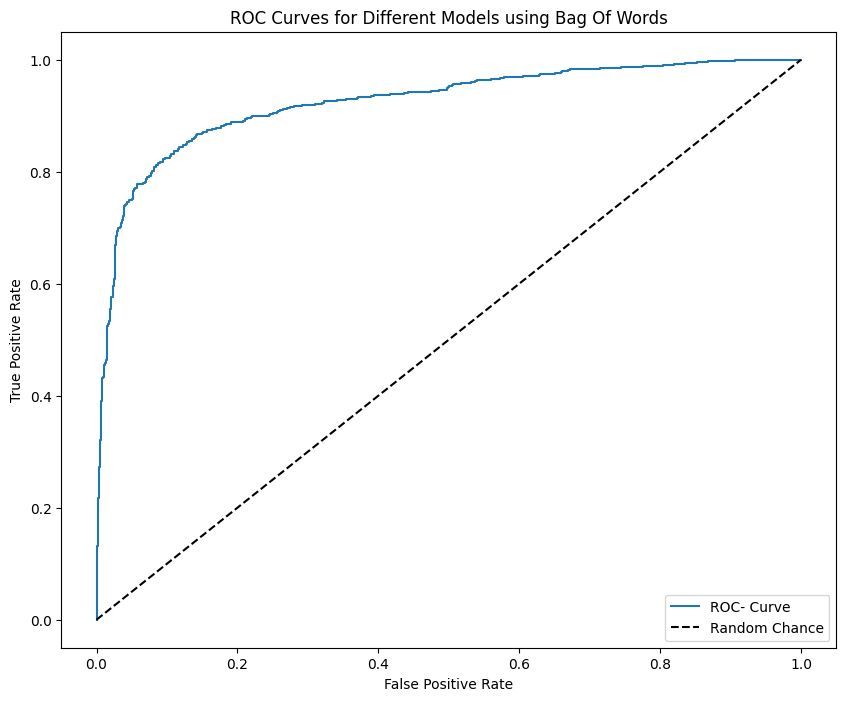

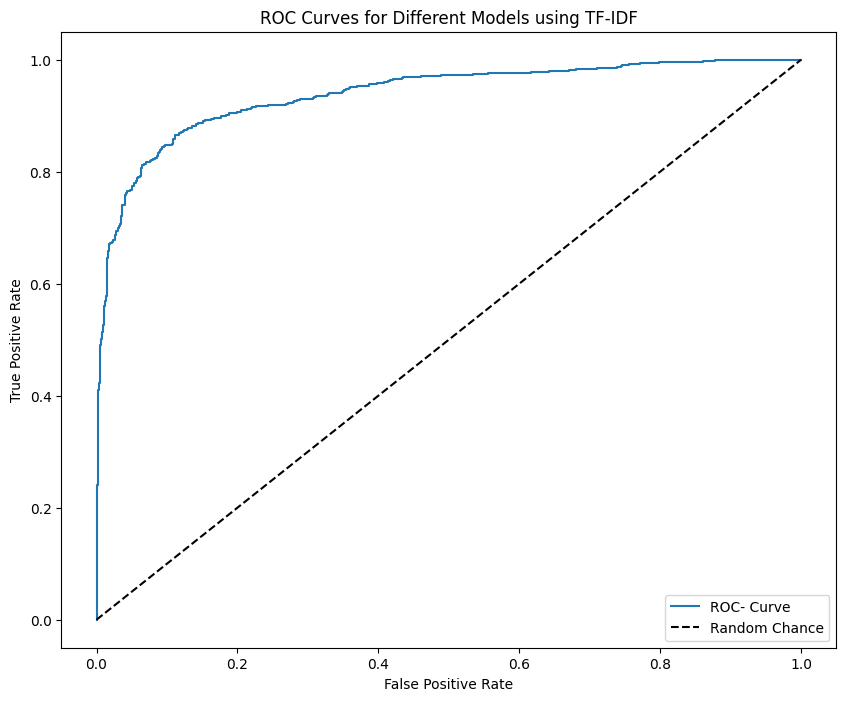

Classification Report for Bag of Words:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       703
           1       0.88      0.87      0.88       823

    accuracy                           0.87      1526
   macro avg       0.87      0.87      0.87      1526
weighted avg       0.87      0.87      0.87      1526

Classification Report for TFIDF:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       703
           1       0.90      0.85      0.88       823

    accuracy                           0.87      1526
   macro avg       0.87      0.87      0.87      1526
weighted avg       0.87      0.87      0.87      1526

Confusion Matrix for Bag of Words:
[[607  96]
 [105 718]]


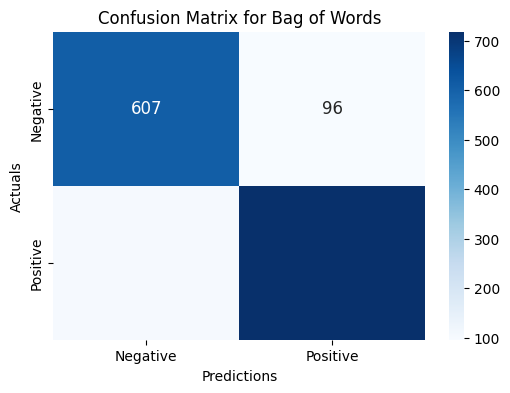

Confusion Matrix for TF-IDF:
[[627  76]
 [121 702]]


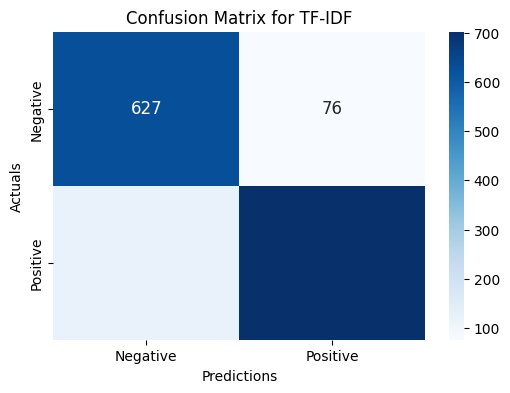

MultinomialNB(alpha=1)
Bag Of Words- Training data score 0.9032786885245901
Bag Of Words- Testing data score 0.8610747051114024


TF-IDF - Training data score 0.9154098360655738
TF-IDF - Testing data score 0.8577981651376146


Model accuracy using Bag of Words: 0.8486238532110092
Model accuracy using TF-IDF : 0.8577981651376146


ROC-AUC Score using BoW: 0.9192663277845858
ROC-AUC Score using TF-IDF: 0.9192663277845858


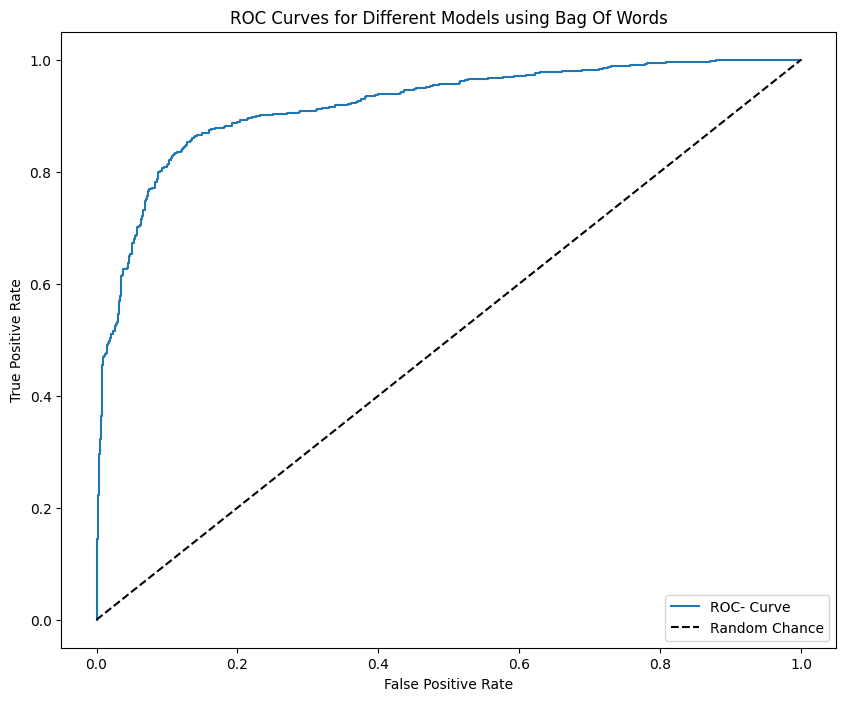

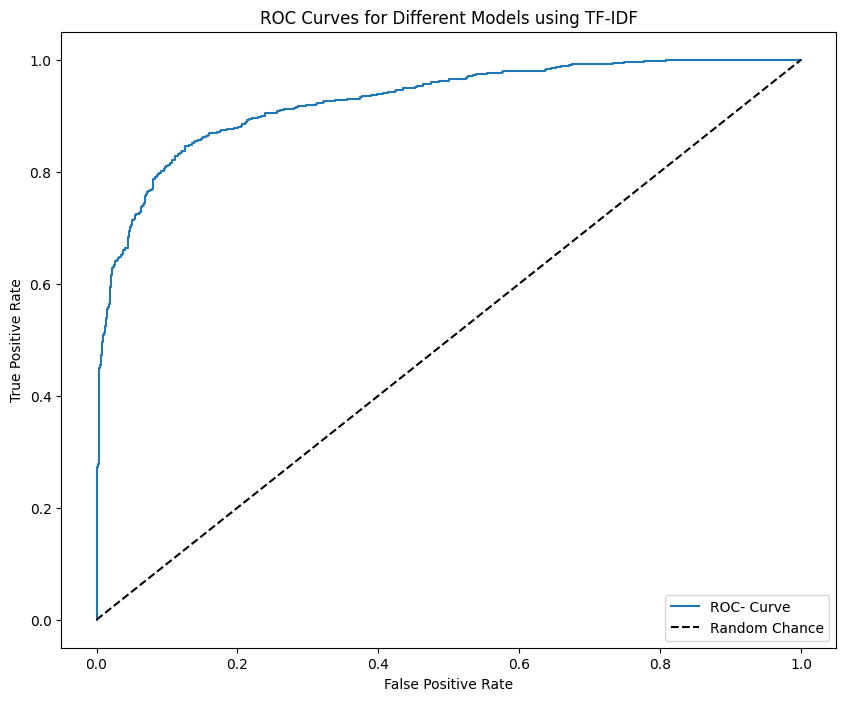

Classification Report for Bag of Words:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       703
           1       0.87      0.84      0.86       823

    accuracy                           0.85      1526
   macro avg       0.85      0.85      0.85      1526
weighted avg       0.85      0.85      0.85      1526

Classification Report for TFIDF:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       703
           1       0.88      0.85      0.87       823

    accuracy                           0.86      1526
   macro avg       0.86      0.86      0.86      1526
weighted avg       0.86      0.86      0.86      1526

Confusion Matrix for Bag of Words:
[[603 100]
 [131 692]]


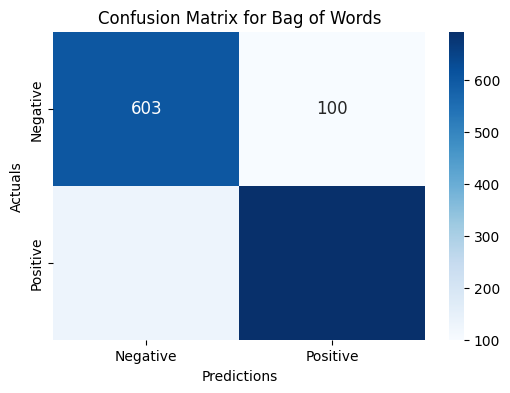

Confusion Matrix for TF-IDF:
[[608  95]
 [122 701]]


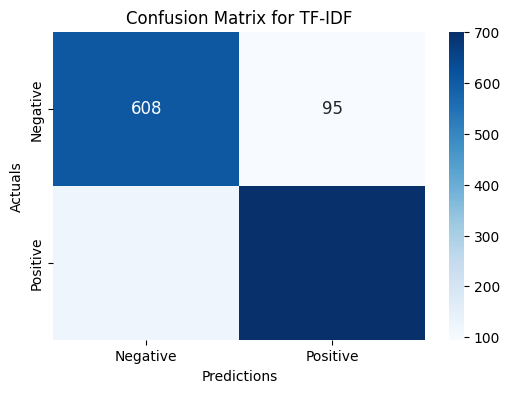

SVC(C=0.4, gamma=0.4, kernel='linear', probability=True)
Bag Of Words- Training data score 0.9019672131147541
Bag Of Words- Testing data score 0.8669724770642202


TF-IDF - Training data score 0.9272131147540984
TF-IDF - Testing data score 0.8774574049803407


Model accuracy using Bag of Words: 0.8433813892529489
Model accuracy using TF-IDF : 0.8774574049803407


ROC-AUC Score using BoW: 0.9253796867789322
ROC-AUC Score using TF-IDF: 0.9253796867789322


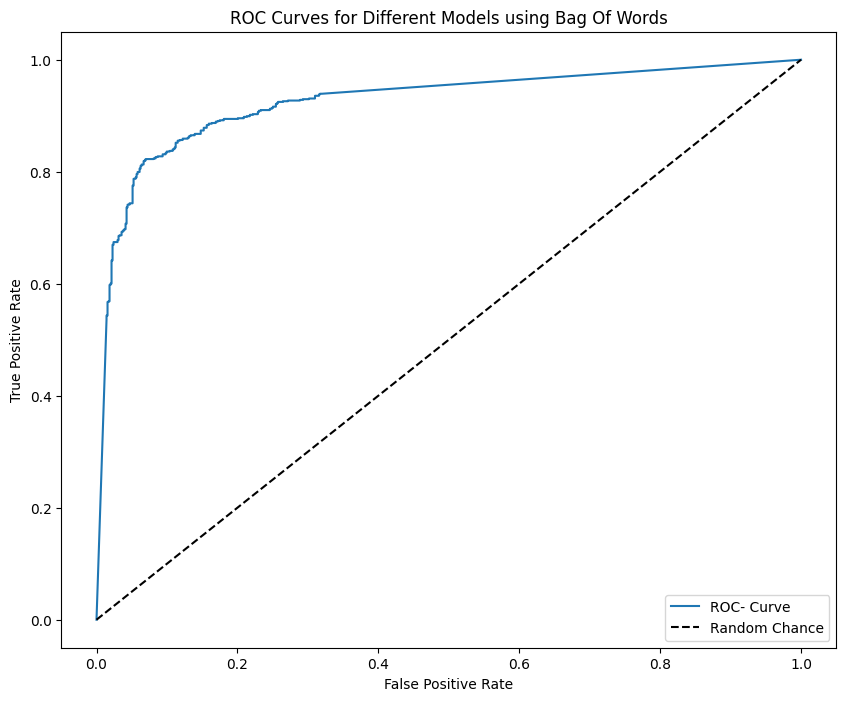

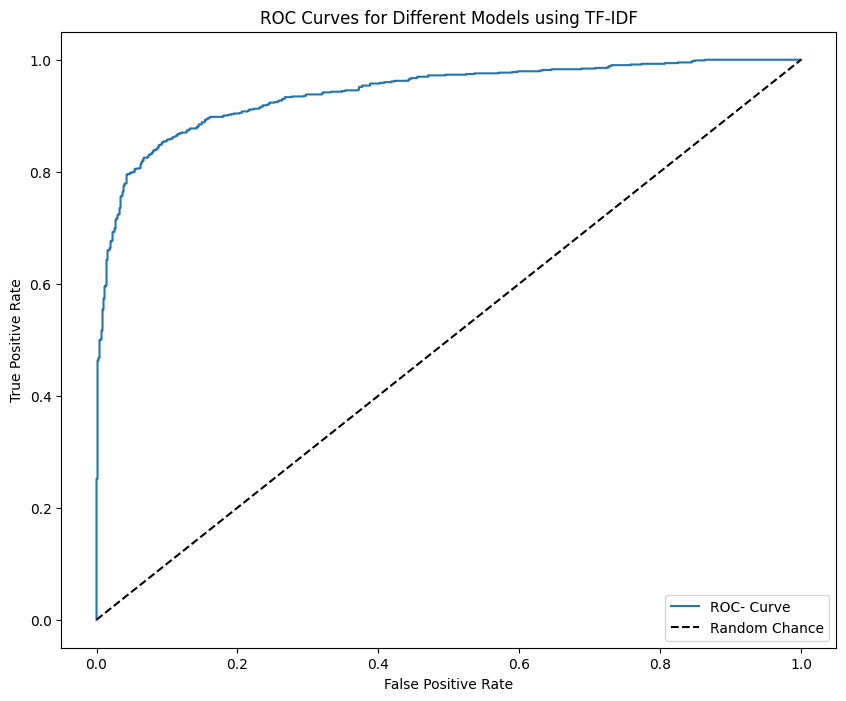

Classification Report for Bag of Words:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       703
           1       0.86      0.85      0.85       823

    accuracy                           0.84      1526
   macro avg       0.84      0.84      0.84      1526
weighted avg       0.84      0.84      0.84      1526

Classification Report for TFIDF:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       703
           1       0.91      0.85      0.88       823

    accuracy                           0.88      1526
   macro avg       0.88      0.88      0.88      1526
weighted avg       0.88      0.88      0.88      1526

Confusion Matrix for Bag of Words:
[[588 115]
 [124 699]]


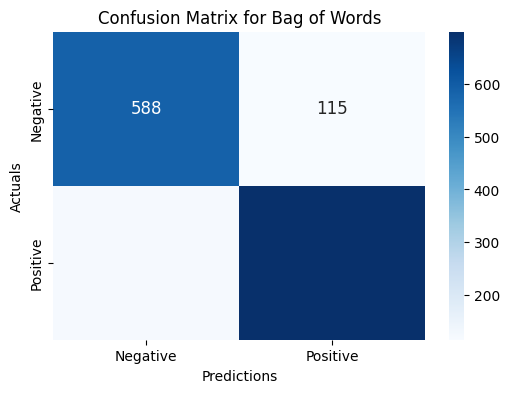

Confusion Matrix for TF-IDF:
[[637  66]
 [121 702]]


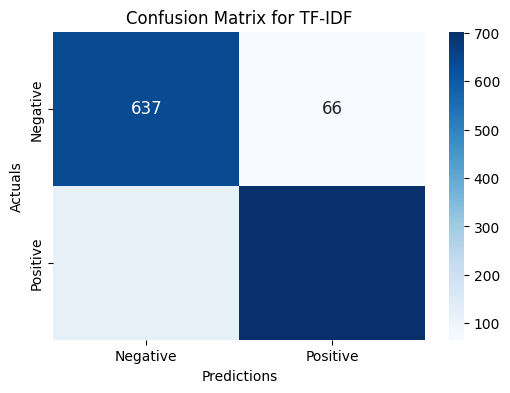

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
Bag Of Words- Training data score 0.7332786885245902
Bag Of Words- Testing data score 0.6926605504587156


TF-IDF - Training data score 0.8213114754098361
TF-IDF - Testing data score 0.7228047182175622


Model accuracy using Bag of Words: 0.7208387942332897
Model accuracy using TF-IDF : 0.7228047182175622


ROC-AUC Score using BoW: 0.6739662857844095
ROC-AUC Score using TF-IDF: 0.6739662857844095


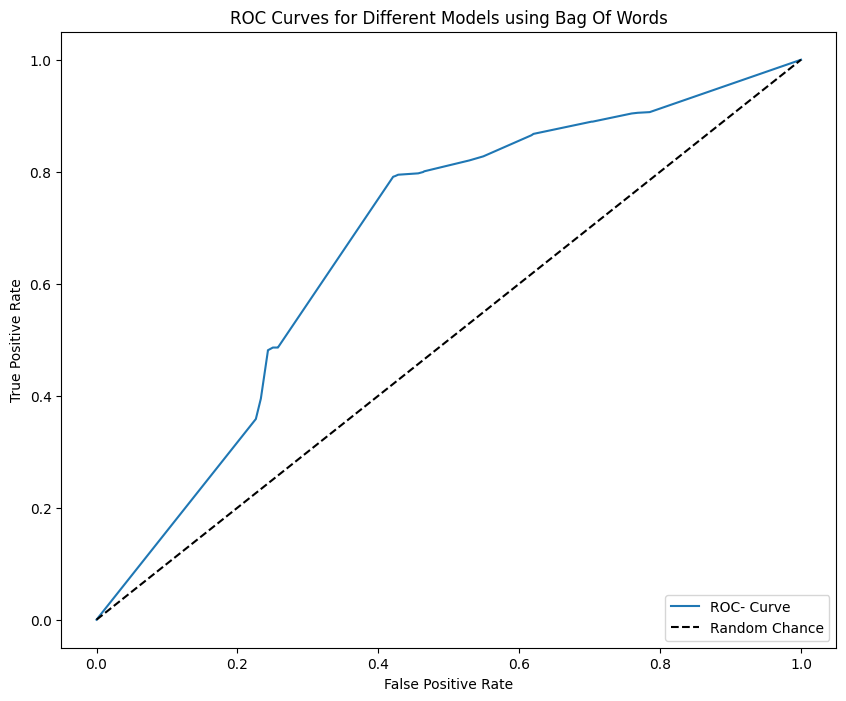

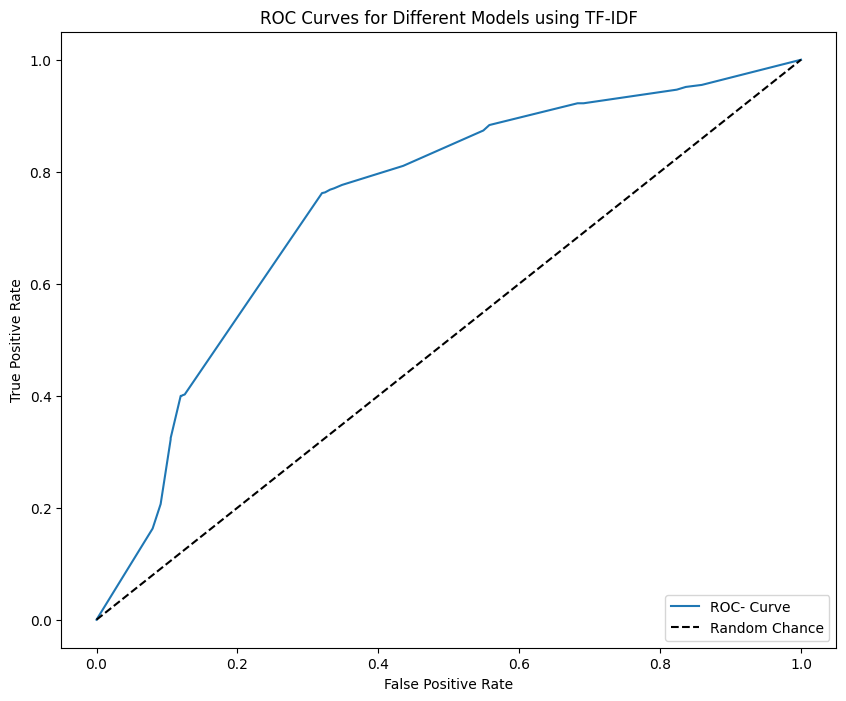

Classification Report for Bag of Words:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       703
           1       0.72      0.80      0.75       823

    accuracy                           0.72      1526
   macro avg       0.72      0.71      0.72      1526
weighted avg       0.72      0.72      0.72      1526

Classification Report for TFIDF:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       703
           1       0.73      0.76      0.75       823

    accuracy                           0.72      1526
   macro avg       0.72      0.72      0.72      1526
weighted avg       0.72      0.72      0.72      1526

Confusion Matrix for Bag of Words:
[[444 259]
 [167 656]]


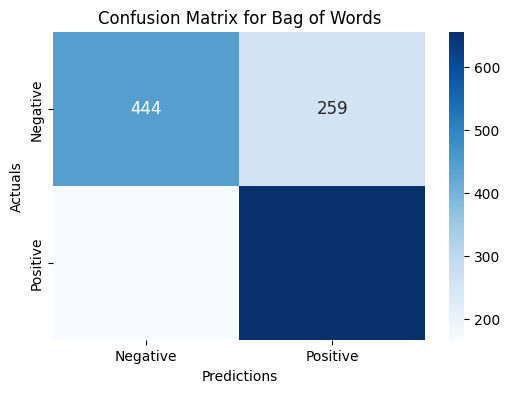

Confusion Matrix for TF-IDF:
[[475 228]
 [195 628]]


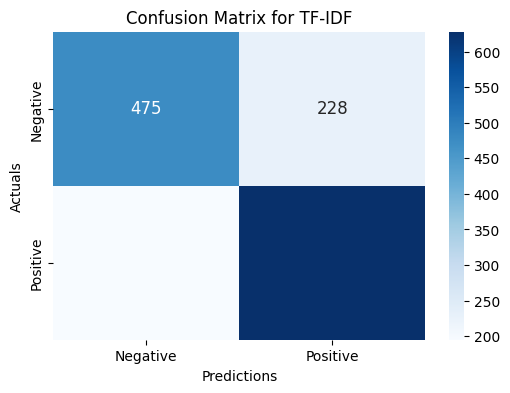

RandomForestClassifier(n_estimators=200, random_state=42)
Bag Of Words- Training data score 0.9568852459016394
Bag Of Words- Testing data score 0.790956749672346


TF-IDF - Training data score 1.0
TF-IDF - Testing data score 0.8237221494102228


Model accuracy using Bag of Words: 0.8296199213630406
Model accuracy using TF-IDF : 0.8237221494102228


ROC-AUC Score using BoW: 0.9019918108298233
ROC-AUC Score using TF-IDF: 0.9019918108298233


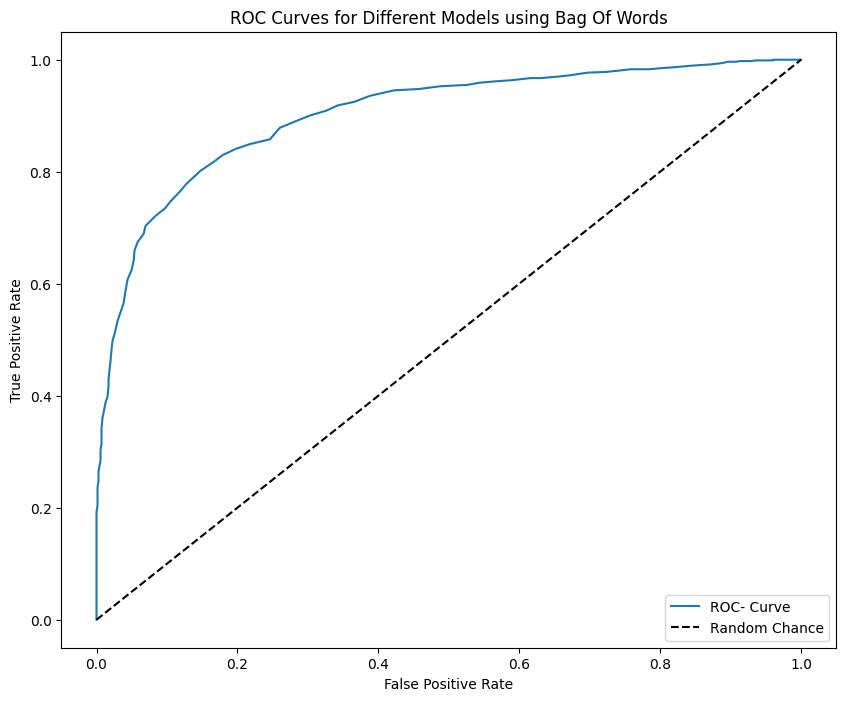

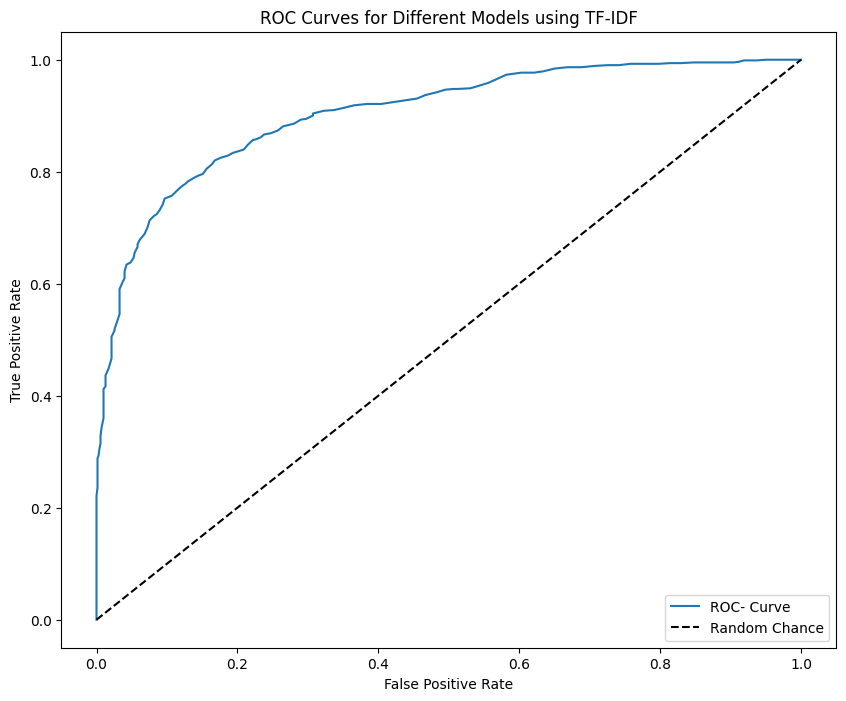

Classification Report for Bag of Words:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       703
           1       0.87      0.80      0.84       823

    accuracy                           0.83      1526
   macro avg       0.83      0.83      0.83      1526
weighted avg       0.83      0.83      0.83      1526

Classification Report for TFIDF:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       703
           1       0.85      0.81      0.83       823

    accuracy                           0.82      1526
   macro avg       0.82      0.82      0.82      1526
weighted avg       0.83      0.82      0.82      1526

Confusion Matrix for Bag of Words:
[[605  98]
 [162 661]]


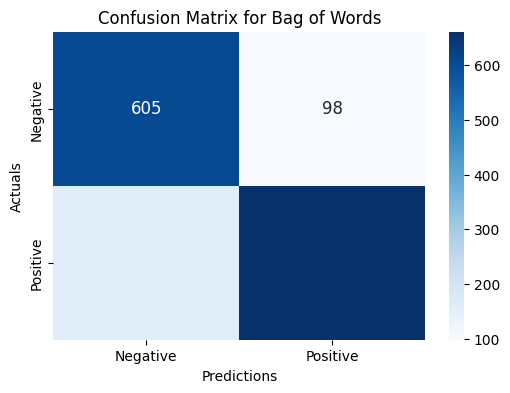

Confusion Matrix for TF-IDF:
[[588 115]
 [154 669]]


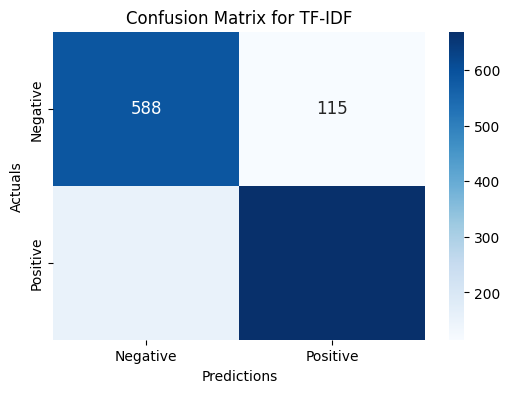

In [44]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)
    
    # Fitting the model for Bag of words
    model.fit(vectorized_training_data, y_train)

    # Predicting the model for bag of words
    y_predict = model.predict(vectorized_test_data)
    
    # Fitting the model for tfidf features 
    model.fit(wghted_training_data, y_train)

    # Predicting the model for tfidf features
    y_tfidf_predict = model.predict(wghted_test_data)
    
    # Determining the R square score for training and test dataset is mainly to assess the potential Overfitting or Underfitting
    print("Bag Of Words- Training data score", model.score(vectorized_training_data, y_train))
    print("Bag Of Words- Testing data score", model.score(vectorized_test_data, y_test))
    print("\n")
    print("TF-IDF - Training data score", model.score(wghted_training_data, y_train))
    print("TF-IDF - Testing data score",  model.score(wghted_test_data, y_test))
    print("\n")
    
    # Accuracy score for bag of words
    model_bow_score = accuracy_score(y_test, y_predict)
    print("Model accuracy using Bag of Words:",model_bow_score)

    # Accuracy score for tfidf features
    model_tfidf_score = accuracy_score(y_test, y_tfidf_predict)
    print("Model accuracy using TF-IDF :",model_tfidf_score)
    print("\n")
    
    # Predict probabilities for BoW and TF-IDF
    model_proba = model.predict_proba(vectorized_test_data)[:, 1]
    model_proba1 = model.predict_proba(wghted_test_data)[:, 1]

    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, model_proba)
    print("ROC-AUC Score using BoW:", roc_auc)
    
    roc_auc1 = roc_auc_score(y_test, model_proba1)
    print("ROC-AUC Score using TF-IDF:", roc_auc)
    
    # Compute ROC curve for BoW
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    
    # Plot ROC curves
    plt.figure(figsize=(10, 8))

    plt.plot(fpr, tpr, label= 'ROC- Curve')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models using Bag Of Words')
    plt.legend(loc='lower right')

    plt.show()
    
    # Compute ROC curve for TF-IDF
    fpr, tpr, _ = roc_curve(y_test, model_proba1)
    
    # Plot ROC curves
    plt.figure(figsize=(10, 8))

    plt.plot(fpr, tpr, label= 'ROC- Curve')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models using TF-IDF')
    plt.legend(loc='lower right')

    plt.show()
    
    
    # Classification report for bag of words 
    model_bow_report = classification_report(y_test, y_predict)
    print("Classification Report for Bag of Words:")
    print(model_bow_report)

    # Classification report for tfidf features
    model_tfidf_report = classification_report(y_test, y_tfidf_predict)
    print("Classification Report for TFIDF:")
    print(model_tfidf_report) 
    
    # Compute confusion matrix for bag of words
    cm_bow = confusion_matrix(y_test, y_predict)

    class_labels = ["Negative","Positive"]

    # Print confusion matrix
    print("Confusion Matrix for Bag of Words:")
    print(cm_bow)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_bow, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix for Bag of Words')
    plt.show()
    
    # Compute confusion matrix for TF-IDF
    cm_tfidf = confusion_matrix(y_test, y_tfidf_predict)

    class_labels = ["Negative","Positive"]

    # Print confusion matrix
    print("Confusion Matrix for TF-IDF:")
    print(cm_tfidf)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_tfidf, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12},
            xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix for TF-IDF')
    plt.show()
                                 